In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
f_path = "../../dataset/coffee_martini/images/cam00.mp4"
vid = imageio.get_reader(f_path, 'ffmpeg')
images = []
for frame_idx, image in enumerate(vid):
    image = cv2.resize(image, (image.shape[0]/(image.shape[0] // 128), ))
    images.append(image)
images = np.array(images)

In [3]:
H, W = images.shape[1:3]
isg_map = np.std(images.transpose([1,2,3,0]).reshape([H, W, -1]), axis=2)
isg_map = np.power(isg_map/5.0 + 1, np.log(300)/np.log(10))
isg_map = isg_map/np.sum(isg_map) # [H, W]

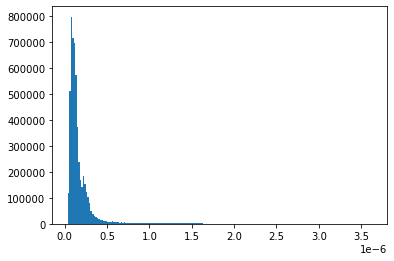

In [6]:
hist = plt.hist(isg_map.reshape(-1), bins = 200)

In [14]:
H, W = images.shape[1:3]
ist_map = np.sum(np.abs(np.diff(images.transpose([1,2,3,0]), axis=-1).reshape([H,W,-1])), axis=-1)
ist_map = ist_map/np.sum(ist_map) # [H, W]

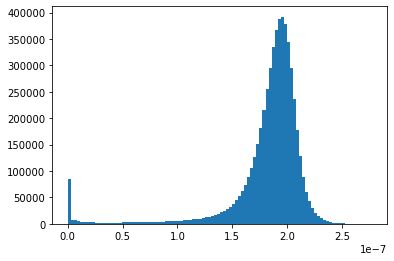

In [15]:
h = plt.hist(ist_map.reshape(-1), bins = 100)

In [13]:
np.diff(images.transpose([1,2,3,0]), axis=-1).shape

(2028, 2704, 3, 299)